# Visualize antibody mix
We will visualize a hypothetical polyclonal antibody mix same way we'd like to visualize the antibody mixes we deconvolve from deep mutational scanning experiments.

The hypothetical mix represents antibodies targeting three major neutralizing "epitopes" on the SARS-CoV-2 receptor-binding domain (RBD) using the classification scheme of [Barnes et al (2020)](https://www.nature.com/articles/s41586-020-2852-1).
In particular, [Barnes et al (2020)](https://www.nature.com/articles/s41586-020-2852-1) divided anti-RBD antibodies that bind to the receptor-binding motif into three classes (see also [Greaney et al (2021)](https://www.nature.com/articles/s41467-021-24435-8)).
For each class, we will use prior deep mutational scanning on a single well-studied monoclonal of that class to antibody to make plausible choices for how mutations affect that antibody class (of course, in reality as there are many somewhat distinct antibodies in each class).
The antibodies used to represent each class are:

  - *LY-CoV016*: class 1, mutation estimates from [Starr et al (2021), Science](https://science.sciencemag.org/content/371/6531/850)
  
  - *LY-CoV555*: class 2, mutation estimates from [Starr et al (2021), Cell Reports Medicine](https://doi.org/10.1016/j.xcrm.2021.100255)
  
  - *REGN10987*: class 3, mutation estimates from [Starr et al (2021), Science](https://science.sciencemag.org/content/371/6531/850)
  
Read in the mutation-level escape values $\beta_{m,e}$ for each mutation against each antibody class for this simulated hypothetical mix:

In [1]:
import pandas as pd

mut_escape_df = pd.read_csv("RBD_mut_escape_df.csv")

mut_escape_df

,epitope,mutation,escape
0,class 1,N331A,0.000
1,class 1,N331D,0.000
2,class 1,N331E,0.000
3,class 1,N331F,0.000
4,class 1,N331G,1.701
...,...,...,...
5791,class 3,T531R,0.000
5792,class 3,T531S,0.000
5793,class 3,T531V,0.000
5794,class 3,T531W,0.000


Note that the data frame only includes 1932 of the $201 \times 19 = 3819$ possible amino-acid mutations to the RBD; this is because only about half of the mutations are functionally tolerated.

We also choose simulated activities $a_{\rm{wt},e}$ for each epitope $e$.
We will let the activity of the polyclonal antibody mix be highest against the class 2 epitope, then next highest against the class 3 epitope, and lowest against the class 1 epitope ([experiments suggest](https://www.nature.com/articles/s41467-021-24435-8) this roughly corresponds to reality for SARS-CoV-2 polyclonal sera):

In [2]:
activity_wt_df = pd.read_csv("RBD_activity_wt_df.csv")

activity_wt_df

,epitope,activity
0,class 1,2.2
1,class 2,3.2
2,class 3,2.4


Now we will visualize the data using `Polyclonal` class provided by this package to model polyclonal antibody mixes:

In [3]:
import polyclonal

poly_abs = polyclonal.Polyclonal(
    activity_wt_df=activity_wt_df, mut_escape_df=mut_escape_df
)

print(f"Epitopes: {poly_abs.epitopes}")
print(f"Number of mutations: {len(poly_abs.mutations)}")
print(f"Number of sites: {len(poly_abs.sites)}")

Epitopes: ('class 1', 'class 2', 'class 3')
Number of mutations: 1932
Number of sites: 173


We can access the activity values, the mutation escape values, site-level summaries of the mutation escape values.
Note that by default, the Hill curve coefficients initialize to one and the non-neutralized fractions to zero:

In [4]:
poly_abs.curve_specs_df

,epitope,activity,hill_coefficient,non_neutralized_frac
0,class 1,2.2,1.0,0.0
1,class 2,3.2,1.0,0.0
2,class 3,2.4,1.0,0.0


In [5]:
poly_abs.mut_escape_df

,epitope,site,wildtype,mutant,mutation,escape
0,class 1,331,N,A,N331A,0.000
1,class 1,331,N,D,N331D,0.000
2,class 1,331,N,E,N331E,0.000
3,class 1,331,N,F,N331F,0.000
4,class 1,331,N,G,N331G,1.701
...,...,...,...,...,...,...
5791,class 3,531,T,R,T531R,0.000
5792,class 3,531,T,S,T531S,0.000
5793,class 3,531,T,V,T531V,0.000
5794,class 3,531,T,W,T531W,0.000


In [6]:
poly_abs.mut_escape_site_summary_df()

,epitope,site,wildtype,mean,total positive,max,min,total negative,n mutations
0,class 1,331,N,0.270062,4.321,2.620,0.0,0.0,16
1,class 1,332,I,0.785579,14.926,3.297,0.0,0.0,19
2,class 1,333,T,0.345667,6.222,2.603,0.0,0.0,18
3,class 1,334,N,0.488778,8.798,1.808,0.0,0.0,18
4,class 1,335,L,0.237526,4.513,1.598,0.0,0.0,19
...,...,...,...,...,...,...,...,...,...
514,class 3,527,P,0.000000,0.000,0.000,0.0,0.0,17
515,class 3,528,K,0.000000,0.000,0.000,0.0,0.0,18
516,class 3,529,K,0.000000,0.000,0.000,0.0,0.0,18
517,class 3,530,S,0.000000,0.000,0.000,0.0,0.0,19


We can also **plot** the relevant values characterizing the polyclonal mix.

Here are the neutralization curves against wildtype for each epitope (these depend on the activity, Hill coefficient, and non-neutralized fraction):

In [7]:
# NBVAL_IGNORE_OUTPUT

poly_abs.curves_plot()

alt.Chart(...)

We can also plot is the mutation escape $\beta_{m,e}$ for each epitope at each site in a heatmap.
We also include lineplots of the mutation escape at each site  summarized by a single number (e.g., as sum of the positive $\beta_{m,e}$ values for that site).
Note that there is a zoom bar at the top of the plot, and options at the bottom of the plot, including whether or not to floor escape values at zero, which site summary statistic to show, and to select sites with high escape values.
You can also mouse over points for details:

In [8]:
# NBVAL_IGNORE_OUTPUT

poly_abs.mut_escape_plot()

alt.VConcatChart(...)

We can also project the site-level summary metrics of the mutation escape onto the protein structure.
Here we do this using [PDB 6m0j](https://www.rcsb.org/structure/6M0J), which holds the SARS-CoV-2 RBD (chain `E`) in complex with ACE2 (chain `A`).
Specific, the `Polyclonal` object has a method to make versions of the PDB in which the B-factor is re-assigned to one of the site-level summary metrics of escape (such as *mean* or *total positive*):

In [9]:
poly_abs.mut_escape_pdb_b_factor(
    input_pdbfile="6M0J.pdb",
    chains="E",
    metric="mean",
    outfile="RBD_{metric}_{epitope}.pdb",
)

,epitope,PDB file
0,class 1,RBD_mean_class_1.pdb
1,class 2,RBD_mean_class_2.pdb
2,class 3,RBD_mean_class_3.pdb


These PDB files can then be colored in `pymol` by the escape metric.
If you want the colors to match the same ones used above by the plotting from the `Polyclonal` object, get the colors and convert them to the RGB tuples used by `pymol`:

In [10]:
import matplotlib.colors

for epitope, hex_color in poly_abs.epitope_colors.items():
    rgb = [round(val, 3) for val in matplotlib.colors.to_rgb(hex_color)]
    print(f"{epitope}: hex color is {hex_color}; RGB tuple is {rgb}")

class 1: hex color is #0072B2; RGB tuple is [0.0, 0.447, 0.698]
class 2: hex color is #CC79A7; RGB tuple is [0.8, 0.475, 0.655]
class 3: hex color is #009E73; RGB tuple is [0.0, 0.62, 0.451]


Then using these colors, we can use the `pymol spectrum` command to re-color by B-factor.
Here is a Python script that can be run within `pymol` (via `run <script>`) to color the ACE2 within the PDB files so that sites in the RBD are colored according to the extent of mutant escape at that site files, with the key helices in ACE2 shown as gray cartoons:

    epitope_colors = {'class_1': [0.0, 0.447, 0.698],
                      'class_2': [0.0, 0.62, 0.451],
                      'class_3': [0.8, 0.475, 0.655],
                      }

    for epitope, max_color in epitope_colors.items():
        cmd.reinitialize()
        infile = f"RBD_mean_{epitope}.pdb"
        cmd.load(infile)
        cmd.bg_color('white')
        cmd.hide('everything')
        cmd.show('cartoon', '(chain A) and resi 18-85')
        cmd.color('gray', 'chain A')
        cmd.set('cartoon_transparency', 0.4, 'chain A')
        cmd.show('spheres', 'chain E')
        cmd.set_color('max_color', epitope_colors[epitope])
        cmd.spectrum('b', 'white max_color', 'chain E')
        cmd.set_view([0.08, -0.9, -0.3,
                      -0.9, -0.2, 0.3,
                      -0.4, 0.3, -0.9,
                      0.0, 0.0, -160.8,
                      -32.5, 25.9, 21.2,
                      87.8, 194.5, -20.0])
        outfile = os.path.splitext(infile)[0] + '.png'
        cmd.png(outfile, ray=1)
        
Here are the images that result if `pymol` is used to run the above script in the same directory to which we wrote the B-factor recolored PDB files:


class 1:


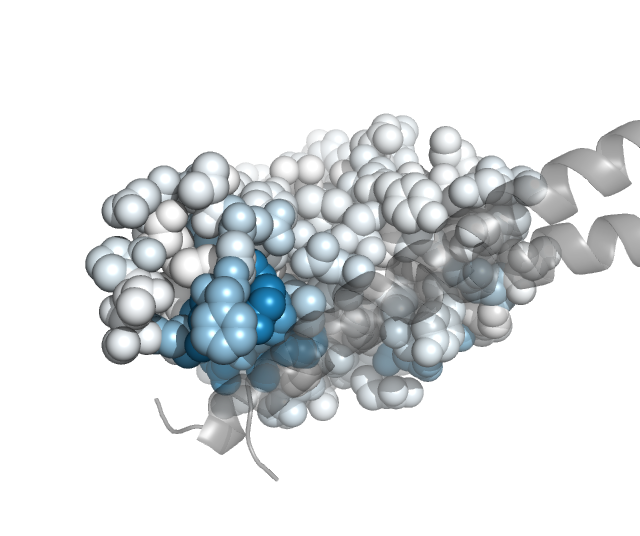


class 2:


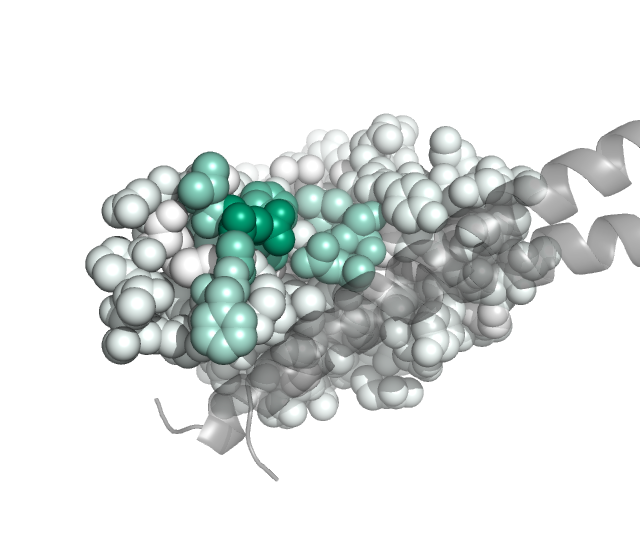


class 3:


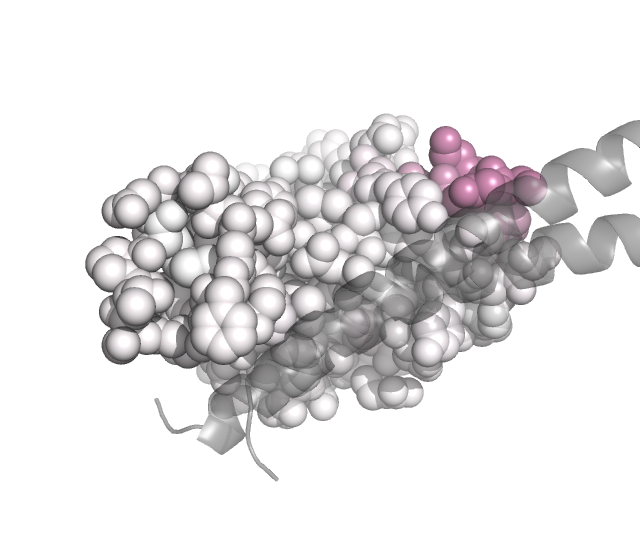

In [11]:
from IPython.display import display, Image

for epitope in poly_abs.epitopes:
    print(f"\n{epitope}:")
    png = f"RBD_mean_{epitope.replace(' ', '_')}.png"
    display(Image(png, width=400))